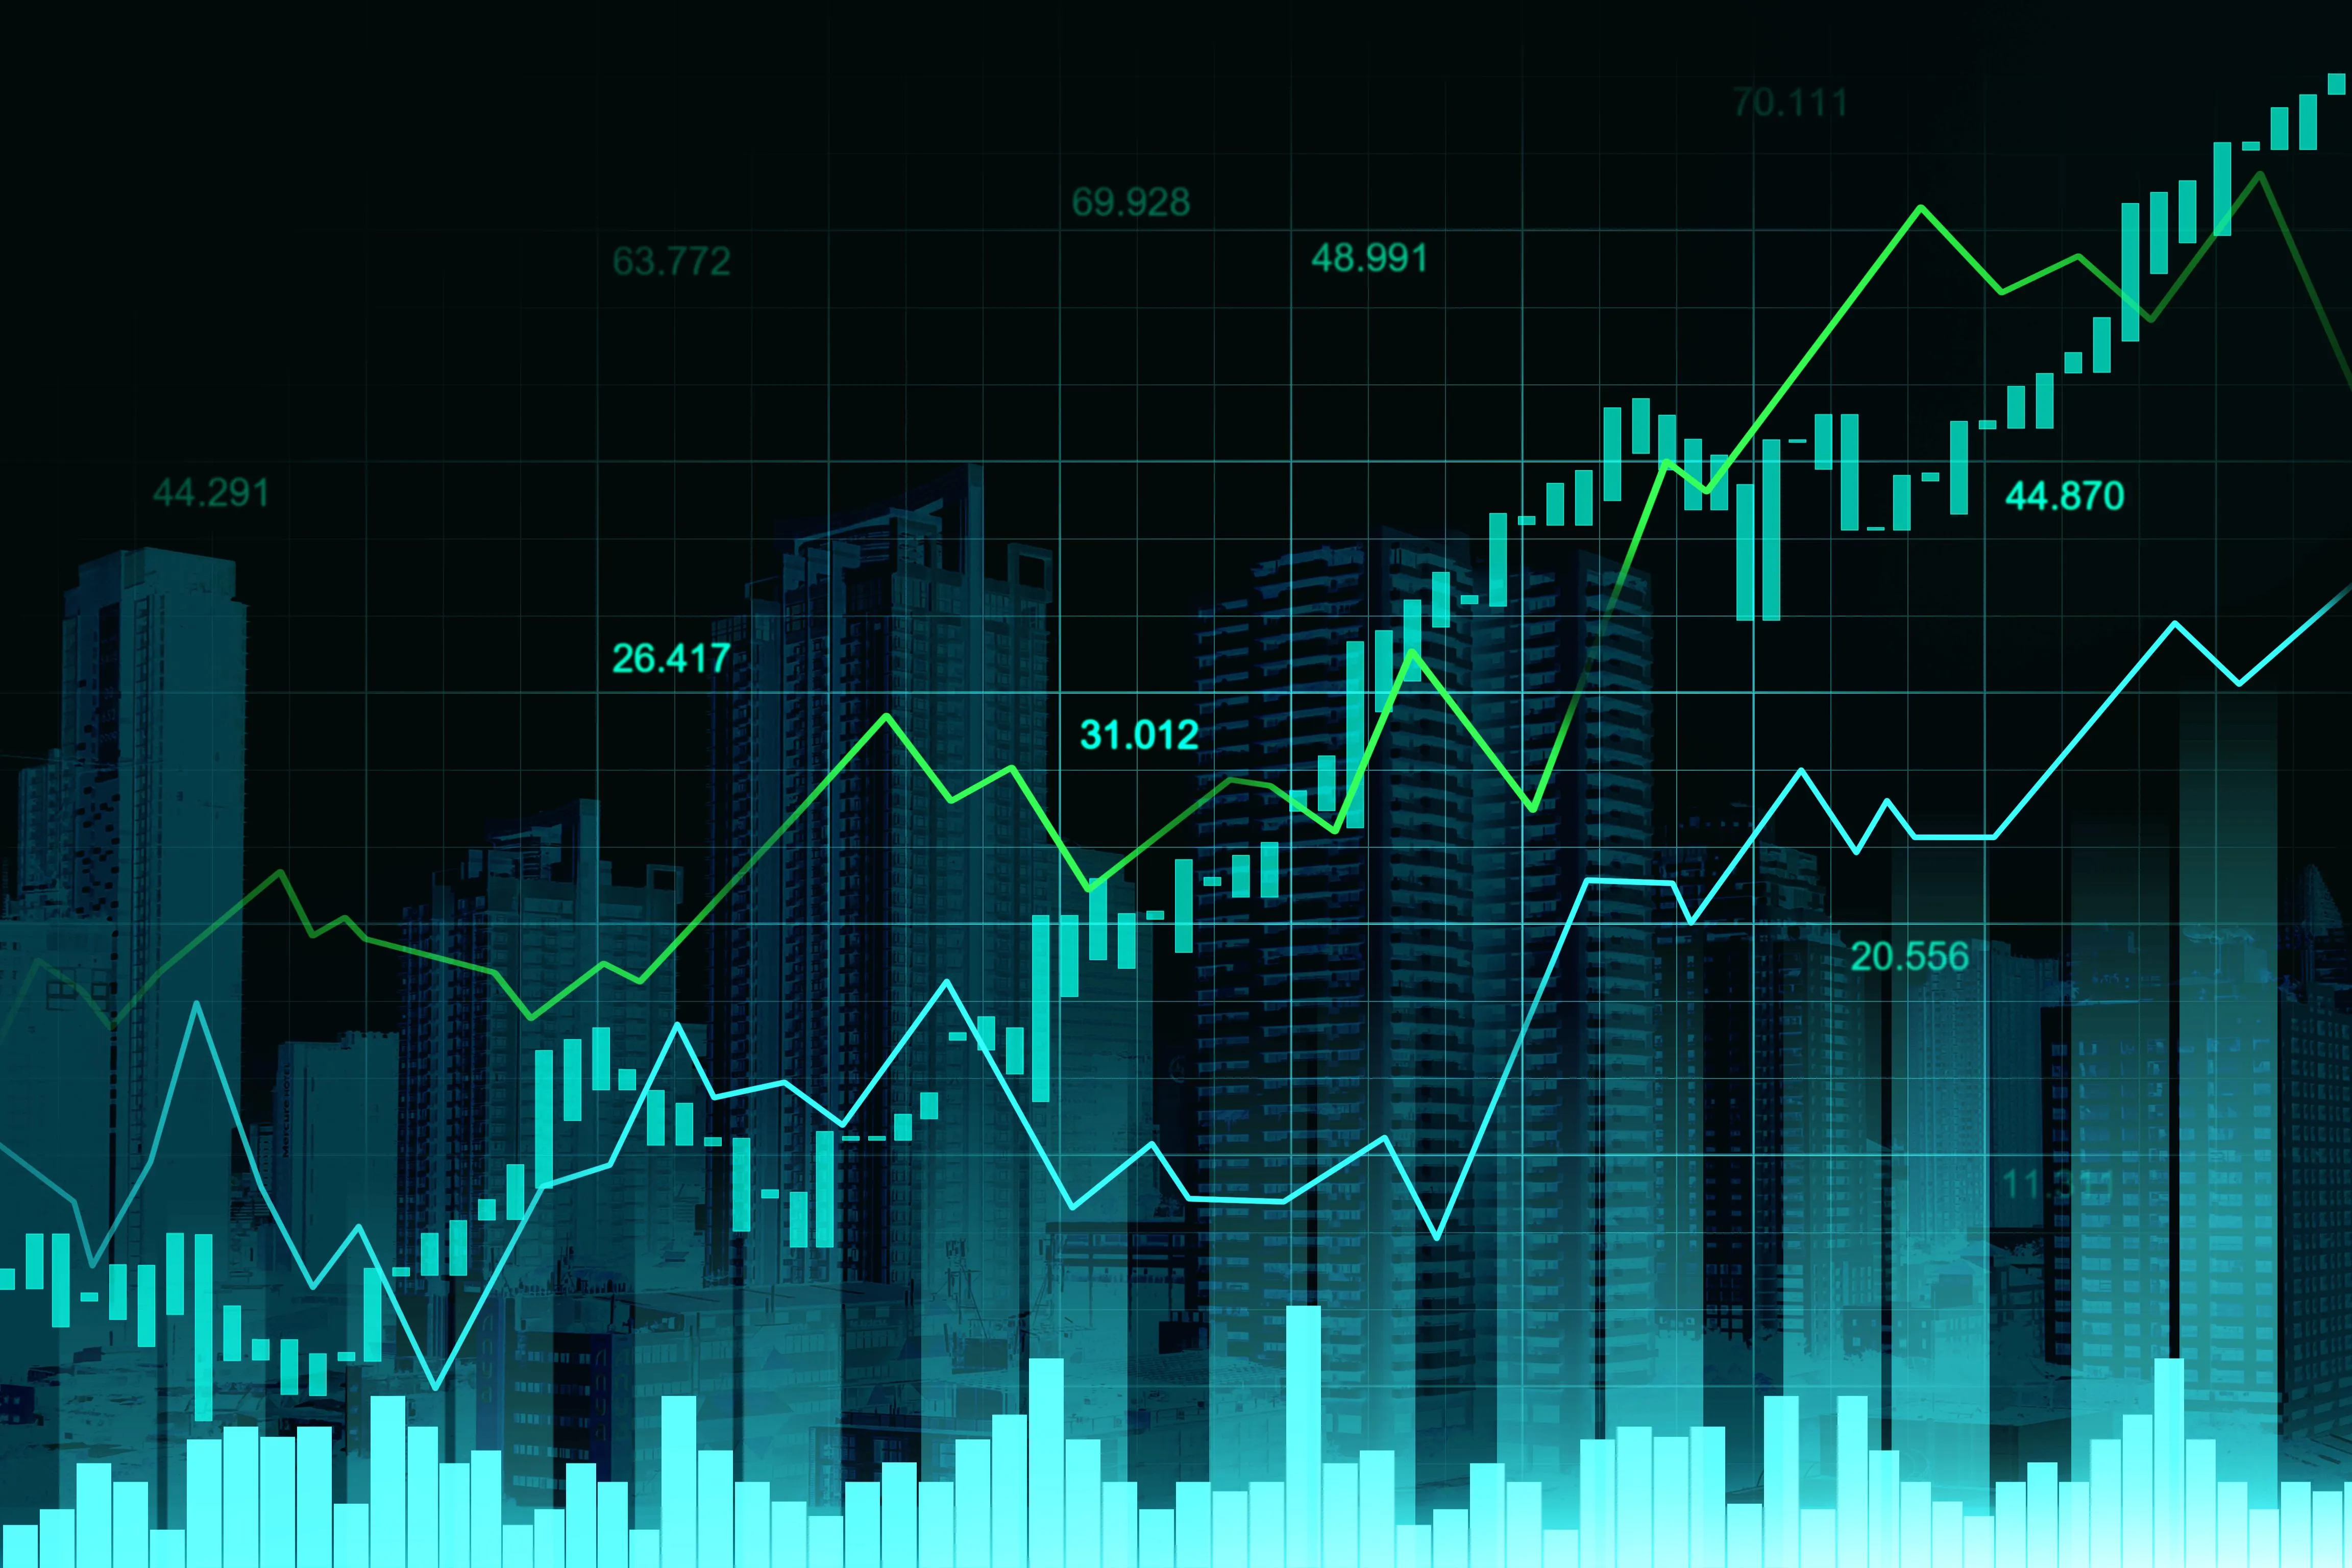

<span style="color:red;"><span style="font-size:15px;"><span style="font-weight:800;"><span style="font-size:15px;"> we can connect here😉 </span>   
[Let's Connect on LinkedIn!](https://www.linkedin.com/in/reza-mohit-6b1998218/)

<div style="color:yellow; 
            padding: 10px; 
            border-radius: 5px; 
            background-color: #002147; 
            font-size: 130%; 
            font-family: verdana; 
            letter-spacing: 0.5px;">

 <span style="font-size:23px;"><span style="font-weight:800;"><span style="color:white;"> 🎯    Stock Price prediction with LSTM </span><br>
     
  <span style="font-size:18px;"><span style="font-weight:800;"><span style="color:yellow;"> In this project, we focus on developing an LSTM model for predicting Bitcoin prices from 2017 to 2024, leveraging historical price data and relevant financial indicators to capture market trends, volatility, and potential patterns, with the aim of improving forecasting accuracy and supporting informed decision-making in cryptocurrency investments. </span>
</div>
     

 <p style="padding:10px;background-color:orange;margin:200;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 1500px 500px;overflow:hidden;font-weight:8000">Thanks for supporting me by upvotes😍🤝</p>

 <p style="color:navy;font-family:newtimeroman;font-size:500%;text-align:center; font-weight:8000">🏁Lets get started🏁</p>

# <p style="padding:20px;background-color:black;margin:0;color:yellow;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">Step 1 | Setup and Initialization</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

<span style="color:navy;"><span style="font-weight:800;"><span style="font-size:18px;"> import our data. </span>

In [3]:
df = pd.read_csv('/kaggle/input/btc-usdt2017-20241201-price-with-rsi/BTC-USD.csv')
df

,date,open,high,low,volume,close,RSI
0,1/1/2017,963.66,1003.08,958.70,147775008,998.33,32.91
1,1/2/2017,998.62,1031.39,996.70,222184992,1021.75,32.95
2,1/3/2017,1021.60,1044.08,1021.60,185168000,1043.84,33.22
3,1/4/2017,1044.40,1159.42,1044.40,344945984,1154.73,33.28
4,1/5/2017,1156.73,1191.10,910.42,510199008,1013.38,33.95
...,...,...,...,...,...,...,...
2888,11/28/2024,95954.95,96650.20,94677.35,52260008261,95652.47,65.86
2889,11/29/2024,95653.95,98693.17,95407.88,54968682476,97461.52,68.18
2890,11/30/2024,97468.81,97499.34,96144.22,31634227866,96449.05,65.50
2891,12/1/2024,96461.34,97888.13,95770.19,36590695296,97279.79,66.66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2893 non-null   object 
 1   open    2893 non-null   float64
 2   high    2893 non-null   float64
 3   low     2893 non-null   float64
 4   volume  2893 non-null   int64  
 5   close   2893 non-null   float64
 6   RSI     2893 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 158.3+ KB


In [5]:
df.describe()

,open,high,low,volume,close,RSI
count,2893.000000,2893.000000,2893.000000,2.893000e+03,2893.000000,2893.000000
mean,24311.989758,24863.134165,23740.375759,2.345084e+10,24343.601054,53.244870
std,21055.296435,21522.346135,20586.149085,1.955136e+10,21091.974892,14.311353
min,775.180000,823.310000,755.760000,6.085170e+07,777.760000,9.920000
25%,7345.380000,7503.870000,7195.530000,8.011668e+09,7354.130000,43.310000
50%,16904.530000,17157.770000,16622.370000,2.062401e+10,16908.240000,52.180000
75%,39148.450000,39966.410000,37884.980000,3.304243e+10,39187.330000,62.700000
max,99006.740000,99655.500000,97232.890000,3.509679e+11,98997.660000,94.300000


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2893 non-null   datetime64[ns]
 1   open    2893 non-null   float64       
 2   high    2893 non-null   float64       
 3   low     2893 non-null   float64       
 4   volume  2893 non-null   int64         
 5   close   2893 non-null   float64       
 6   RSI     2893 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 158.3 KB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df

,date,open,high,low,volume,close,RSI
0,2017-01-01,963.66,1003.08,958.70,147775008,998.33,32.91
1,2017-01-02,998.62,1031.39,996.70,222184992,1021.75,32.95
2,2017-01-03,1021.60,1044.08,1021.60,185168000,1043.84,33.22
3,2017-01-04,1044.40,1159.42,1044.40,344945984,1154.73,33.28
4,2017-01-05,1156.73,1191.10,910.42,510199008,1013.38,33.95
...,...,...,...,...,...,...,...
2888,2024-11-28,95954.95,96650.20,94677.35,52260008261,95652.47,65.86
2889,2024-11-29,95653.95,98693.17,95407.88,54968682476,97461.52,68.18
2890,2024-11-30,97468.81,97499.34,96144.22,31634227866,96449.05,65.50
2891,2024-12-01,96461.34,97888.13,95770.19,36590695296,97279.79,66.66


# <p style="padding:20px;background-color:black;margin:0;color:yellow;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">Step 2 | Data set Over view</p>

In [10]:
df_avg=pd.DataFrame(df)

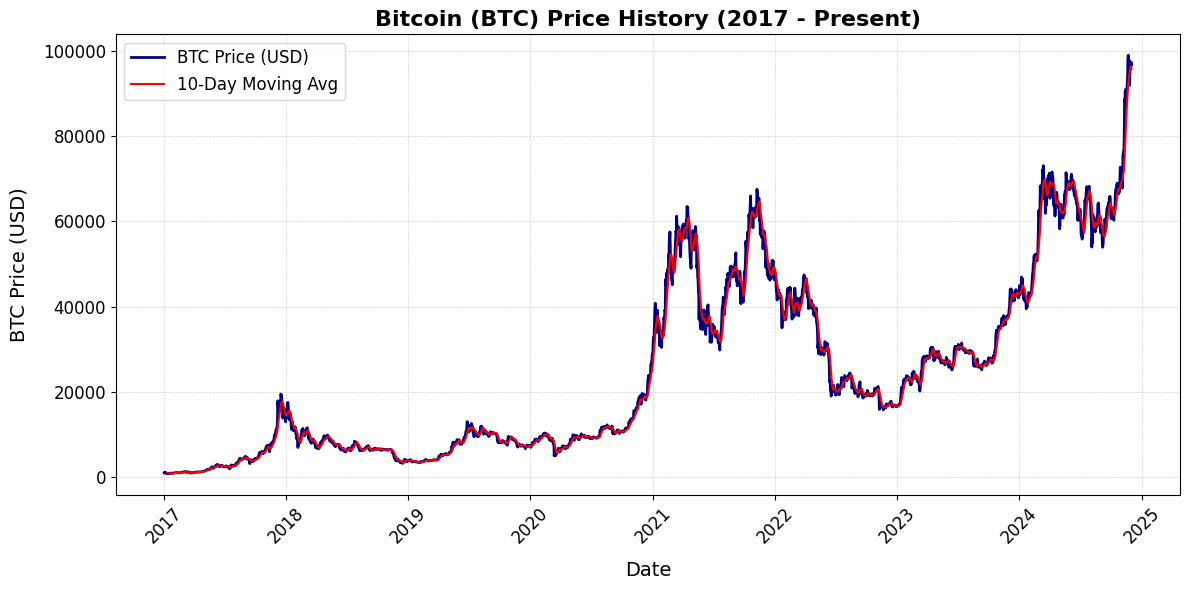

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 6))  # Set figure size

# Plot the data
plt.plot(df['date'], df['close'], color='navy', linewidth=2, label='BTC Price (USD)')
df_avg['Moving_Avg'] = df['close'].rolling(window=10).mean()  # 10-day moving average
plt.plot(df['date'], df_avg['Moving_Avg'], label='10-Day Moving Avg', color='red')
plt.legend()

# Title and labels
plt.title('Bitcoin (BTC) Price History (2017 - Present)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('BTC Price (USD)', fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Grid and legend
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper left')

# Add a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


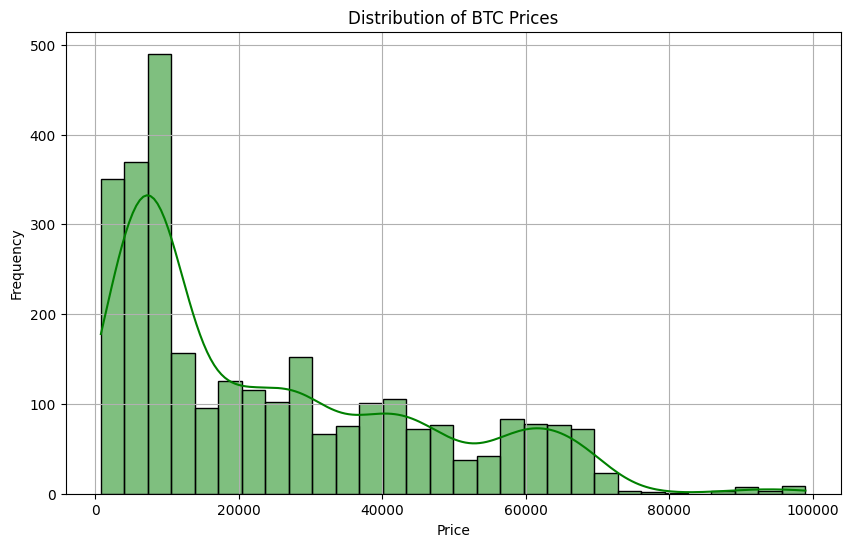

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['close'], kde=True, bins=30, color='green')
plt.title('Distribution of BTC Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()


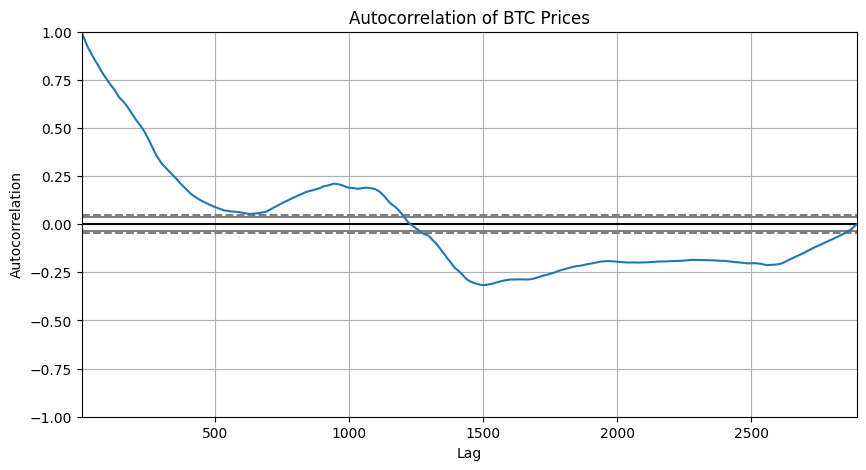

In [13]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(df['close'])
plt.title('Autocorrelation of BTC Prices')
plt.show()



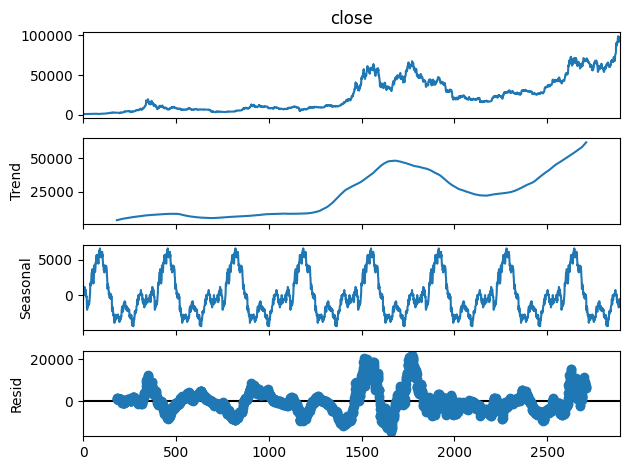

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['close'], model='additive', period=365)
decomposition.plot()
plt.show()


In [15]:
df_dates = df['date']
df_timeless=df.drop(columns=['date','RSI'],axis=1)
df_timeless

,open,high,low,volume,close
0,963.66,1003.08,958.70,147775008,998.33
1,998.62,1031.39,996.70,222184992,1021.75
2,1021.60,1044.08,1021.60,185168000,1043.84
3,1044.40,1159.42,1044.40,344945984,1154.73
4,1156.73,1191.10,910.42,510199008,1013.38
...,...,...,...,...,...
2888,95954.95,96650.20,94677.35,52260008261,95652.47
2889,95653.95,98693.17,95407.88,54968682476,97461.52
2890,97468.81,97499.34,96144.22,31634227866,96449.05
2891,96461.34,97888.13,95770.19,36590695296,97279.79


# <p style="padding:20px;background-color:black;margin:0;color:yellow;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">Step 3 | Pre processing</p>

In [16]:
df_test=df_timeless.iloc[2770:].astype(np.float32)  # last 4 month(test)
df_val=df_timeless.iloc[2650:2770].astype(np.float32)  # 4 month before test (val)
df_train=df_timeless.iloc[:2650].astype(np.float32)  # from 2017 till last 8 month(train)

In [17]:
dates_test = df_dates.iloc[2770:]
dates_val = df_dates.iloc[2650:2770]
dates_train = df_dates.iloc[:2650]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2650 non-null   float32
 1   high    2650 non-null   float32
 2   low     2650 non-null   float32
 3   volume  2650 non-null   float32
 4   close   2650 non-null   float32
dtypes: float32(5)
memory usage: 51.9 KB


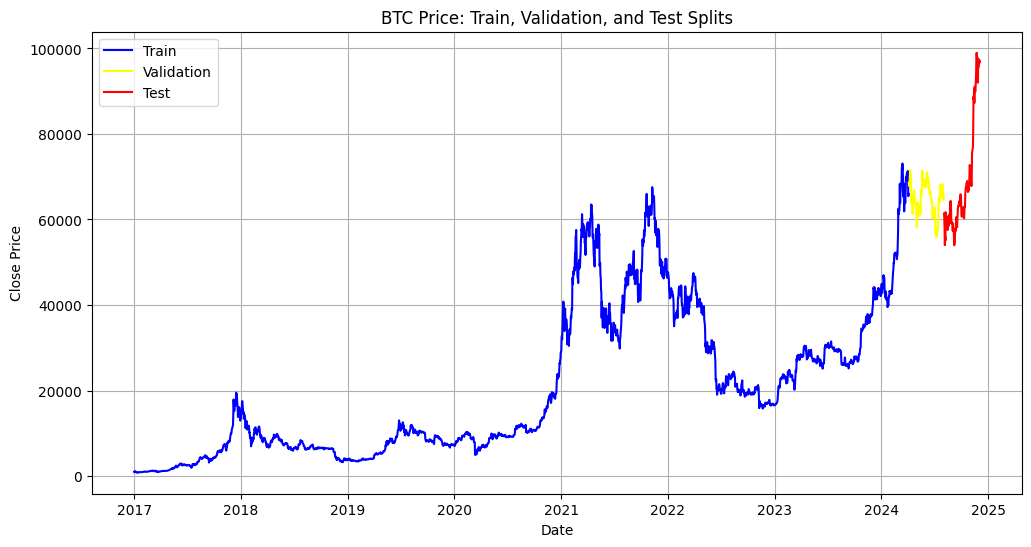

In [18]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(dates_train, df_train['close'], label='Train', color='blue')

# Plot validation data
plt.plot(dates_val, df_val['close'], label='Validation', color='yellow')

# Plot test data
plt.plot(dates_test, df_test['close'], label='Test', color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Price: Train, Validation, and Test Splits')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler

# List of features to scale (excluding 'close' as it's the target)
features_to_scale = ['open', 'high', 'low', 'volume']

# Initialize scalers
scaler = MinMaxScaler(feature_range=(0, 1))  # For features
scaler_y = MinMaxScaler(feature_range=(0, 1))  # For the target 'close'

# Fit the scalers
scaler.fit(df_train[features_to_scale])  # Fit on input features
scaler_y.fit(df_train[['close']].values.reshape(-1, 1))  # Fit only on the target 'close'

# Transform the features
df_train[features_to_scale] = scaler.transform(df_train[features_to_scale])
df_val[features_to_scale] = scaler.transform(df_val[features_to_scale])
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# Transform and update the 'close' column in the DataFrame
df_train['close'] = scaler_y.transform(df_train[['close']].values.reshape(-1, 1))
df_val['close'] = scaler_y.transform(df_val[['close']].values.reshape(-1, 1))
df_test['close'] = scaler_y.transform(df_test[['close']].values.reshape(-1, 1))

# Prepare target variables for training, validation, and testing
y_train = df_train[['close']].values
y_val = df_val[['close']].values
y_test = df_test[['close']].values


In [20]:
# Function to create sequences (ensuring only features are included in X)
def create_sequences(df_timeless, target_col, look_back=30, feature_cols=None):
    X, y = [], []
    for i in range(len(df_timeless) - look_back):
        X.append(df_timeless[feature_cols].iloc[i:i+look_back].values)  # Only use selected features for X
        y.append(df_timeless.iloc[i + look_back][target_col])  # Use 'close' for y
    return np.array(X), np.array(y)

# List of features to use for X (exclude 'close')
features = ['open', 'high', 'low', 'volume']

# Prepare sequences for train, validation, and test sets
X_train, y_train = create_sequences(df_train, target_col='close', look_back=30, feature_cols=features)
X_val, y_val = create_sequences(df_val, target_col='close', look_back=30, feature_cols=features)
X_test, y_test = create_sequences(df_test, target_col='close', look_back=30, feature_cols=features)

y_train = np.reshape(y_train, (-1, 1))
y_val = np.reshape(y_val, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

# Check the shapes of the resulting arrays
print(f"Train X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Validation X shape: {X_val.shape}, y shape: {y_val.shape}")
print(f"Test X shape: {X_test.shape}, y shape: {y_test.shape}")


Train X shape: (2620, 30, 4), y shape: (2620, 1)
Validation X shape: (90, 30, 4), y shape: (90, 1)
Test X shape: (93, 30, 4), y shape: (93, 1)


# <p style="padding:20px;background-color:black;margin:0;color:yellow;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">Step 4 |  LSTM</p>

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import Nadam


# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),  # Dense layer for intermediate learning
    Dense(1)  # Output layer (predicting the 'Close' price)
])

# Compile the model
learning_rate = 0.001  # Adjust this value as needed

custom_optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1000, restore_best_weights=True,verbose=1)

# Model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,801 (206.25 KB)

 Trainable params: 52,801 (206.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=64,
    verbose=1,callbacks=[early_stop]
)


Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0208 - val_loss: 0.0026
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5440e-04 - val_loss: 0.0017
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4879e-04 - val_loss: 0.0026
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3386e-04 - val_loss: 0.0019
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8376e-04 - val_loss: 0.0018
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3234e-04 - val_loss: 0.0012
Epoch 9/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8553e-04 - val_loss: 0.0023
Epoch 10/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4201e-04 - val_loss: 0.0036
Epoch 11/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6315e-04 - val_loss: 0.0017
Epoch 12/150
41/41 ━━━━━━━━━━━

In [23]:
from sklearn.metrics import r2_score
test_loss = model.evaluate(X_test, y_test, verbose=0)
r2 = r2_score(y_test, model.predict(X_test))
print(f"R² Score on Test Data: {r2:.4f}")
print(f"Test Loss (MSE): {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
R² Score on Test Data: 0.9749
Test Loss (MSE): 0.0009


<div style="color:black; 
            padding: 10px; 
            border-radius: 5px; 
            background-color: #FFA500; 
            font-size: 130%; 
            font-family: newtimeroman;
            text-align:center;
            letter-spacing: 0.5px;">

     
  <span style="font-size:18px;"><span style="font-weight:800;"><span style="color:black;"> the results with simple LSTM were pretty good.but if you are unsatisfied or want more accurate results,you can use approaches like GRID SEARCH or even OPTUNA for searching and testing various range of hyperparametrs,to give you best hyperparametr tuning based on your layers structure,here is an example of using OPTUNA: </span>
</div>
     

In [29]:
import optuna
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input, LeakyReLU, ELU, ReLU
from keras.optimizers import Adam, AdamW, RMSprop, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score

# Use MirroredStrategy for multi-GPU setup
strategy = tf.distribute.MirroredStrategy()  # Automatically detects and uses available GPUs
print("Number of devices:", strategy.num_replicas_in_sync)

with strategy.scope():  # Everything inside the MirroredStrategy scope
    # Define the objective function for Optuna
    def objective(trial):
        # Hyperparameters to tune
        lstm_units = trial.suggest_int("lstm_units", 128, 256, step=128)
        dense_units = trial.suggest_int("dense_units", 16, 128, step=16)
        dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)
        optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "AdamW","Nadam"])
        activation_function = trial.suggest_categorical("activation_function", ["relu", "leaky_relu", "elu"])

        # Select optimizer based on trial
        if optimizer_name == "Adam":
            optimizer = Adam(learning_rate=0.00025)
        elif optimizer_name == "AdamW":
            optimizer = AdamW(learning_rate=0.00025)
        elif optimizer_name == "Nadam":
            optimizer = Nadam(learning_rate=0.00025)
            
        # Create the model
        model = Sequential([
            Input(shape=(X_train.shape[1], X_train.shape[2])),
            LSTM(lstm_units, return_sequences=True),
            Dropout(dropout_rate),
            LSTM(lstm_units, return_sequences=True),
            Dropout(dropout_rate),
            LSTM(lstm_units, return_sequences=False),
            Dropout(dropout_rate),
            Dense(dense_units, activation=None),  # No activation function here
            # Dynamically apply the activation function
            LeakyReLU(alpha=0.1) if activation_function == "leaky_relu" else 
            ELU(alpha=1.0) if activation_function == "elu" else 
            ReLU(),
            Dense(1)  # Final output for regression
        ])
        model.compile(optimizer=optimizer, loss='mean_squared_error')

        # Add EarlyStopping and ModelCheckpoint
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        )

        # Train the model
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=128,  # Adjusted for GPU performance
            verbose=0,
            callbacks=[early_stop]
        )
        
        # Predict on test data
        y_test_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_test_pred)

        return 1 - r2  # Optuna minimizes, so we invert R²

    # Setting up SQLite ,that if your net or pc getting shut down,it wont start from zero.
    study_name = "time_series_optimization_gpu"  # Name your study
    storage_name = "sqlite:///optuna_study_gpu.db"  # SQLite file for persistent storage

    # Create or load existing study
    study = optuna.create_study(
        study_name=study_name,
        storage=storage_name,
        direction="minimize",
        load_if_exists=True
    )

    # Run Optuna optimization
    study.optimize(objective, n_trials=50)

    # Best hyperparameters based on test R² score
    print("Best trial:")
    trial = study.best_trial
    print(f"R² on test set: {1 - trial.value:.4f}")
    print(f"Best Hyperparameters: {trial.params}")


[I 2025-04-29 19:31:34,018] Using an existing study with name 'time_series_optimization_gpu' instead of creating a new one.


Number of devices: 2
Epoch 93: early stopping
Restoring model weights from the end of the best epoch: 73.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


[I 2025-04-29 19:32:40,139] Trial 4 finished with value: 0.07049716867014555 and parameters: {'lstm_units': 256, 'dense_units': 48, 'dropout_rate': 0.31040198298628635, 'optimizer': 'Adam', 'activation_function': 'relu'}. Best is trial 4 with value: 0.07049716867014555.


Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 18.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step


[I 2025-04-29 19:33:14,049] Trial 5 finished with value: 0.2176526592760204 and parameters: {'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.4746427013497336, 'optimizer': 'Nadam', 'activation_function': 'relu'}. Best is trial 4 with value: 0.07049716867014555.


Restoring model weights from the end of the best epoch: 87.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


[I 2025-04-29 19:34:25,901] Trial 6 finished with value: 0.09309254234079833 and parameters: {'lstm_units': 128, 'dense_units': 48, 'dropout_rate': 0.4131577416202745, 'optimizer': 'Nadam', 'activation_function': 'relu'}. Best is trial 4 with value: 0.07049716867014555.


Restoring model weights from the end of the best epoch: 93.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step


[I 2025-04-29 19:35:38,117] Trial 7 finished with value: 0.05490082340799107 and parameters: {'lstm_units': 256, 'dense_units': 64, 'dropout_rate': 0.251066944797798, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 96.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


[I 2025-04-29 19:36:53,738] Trial 8 finished with value: 0.06180502272810162 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.31357241492533533, 'optimizer': 'Nadam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 54.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step


[I 2025-04-29 19:37:46,031] Trial 9 finished with value: 0.12748596037627524 and parameters: {'lstm_units': 128, 'dense_units': 48, 'dropout_rate': 0.48487614557441105, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 26.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step


[I 2025-04-29 19:38:25,494] Trial 10 finished with value: 0.15296019974680475 and parameters: {'lstm_units': 128, 'dense_units': 48, 'dropout_rate': 0.33463133552750846, 'optimizer': 'Nadam', 'activation_function': 'leaky_relu'}. Best is trial 7 with value: 0.05490082340799107.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 87: early stopping
Restoring model weights from the end of the best epoch: 67.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step


[I 2025-04-29 19:39:27,868] Trial 11 finished with value: 0.06971016103887484 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.211746458271953, 'optimizer': 'AdamW', 'activation_function': 'leaky_relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 97.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step


[I 2025-04-29 19:40:39,063] Trial 12 finished with value: 0.06210435546577742 and parameters: {'lstm_units': 256, 'dense_units': 96, 'dropout_rate': 0.2782780893377934, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 100.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


[I 2025-04-29 19:41:53,873] Trial 13 finished with value: 0.06424174050113907 and parameters: {'lstm_units': 256, 'dense_units': 96, 'dropout_rate': 0.37745498161764857, 'optimizer': 'Nadam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 90.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


[I 2025-04-29 19:43:05,967] Trial 14 finished with value: 0.05941395955999462 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.20677093345842873, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 88.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step


[I 2025-04-29 19:44:16,389] Trial 15 finished with value: 0.06087418397423594 and parameters: {'lstm_units': 256, 'dense_units': 80, 'dropout_rate': 0.20602982702754946, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 97.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


[I 2025-04-29 19:45:28,776] Trial 16 finished with value: 0.05843762068614222 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.25517667738024774, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 82: early stopping
Restoring model weights from the end of the best epoch: 62.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


[I 2025-04-29 19:46:30,025] Trial 17 finished with value: 0.07635794430240583 and parameters: {'lstm_units': 256, 'dense_units': 80, 'dropout_rate': 0.2570372249307329, 'optimizer': 'AdamW', 'activation_function': 'leaky_relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 89.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


[I 2025-04-29 19:47:40,755] Trial 18 finished with value: 0.06978639457515023 and parameters: {'lstm_units': 256, 'dense_units': 64, 'dropout_rate': 0.28090630172664877, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 92.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


[I 2025-04-29 19:48:57,595] Trial 19 finished with value: 0.06524086623574388 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.36584905057997963, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 54.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


[I 2025-04-29 19:49:52,201] Trial 20 finished with value: 0.07777120189322295 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.24072478770734435, 'optimizer': 'AdamW', 'activation_function': 'leaky_relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 85.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


[I 2025-04-29 19:51:01,373] Trial 21 finished with value: 0.12184387231535143 and parameters: {'lstm_units': 128, 'dense_units': 16, 'dropout_rate': 0.2879399951029575, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 94.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step


[I 2025-04-29 19:52:11,724] Trial 22 finished with value: 0.056269412890284976 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.22804248569205302, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 91.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step


[I 2025-04-29 19:53:25,232] Trial 23 finished with value: 0.05649059413294322 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.23288859832847345, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 87: early stopping
Restoring model weights from the end of the best epoch: 67.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


[I 2025-04-29 19:54:27,599] Trial 24 finished with value: 0.06774889861404865 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.23123651516112606, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 43.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


[I 2025-04-29 19:55:20,180] Trial 25 finished with value: 0.07573641569549228 and parameters: {'lstm_units': 256, 'dense_units': 80, 'dropout_rate': 0.226862175007905, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 86.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step


[I 2025-04-29 19:56:33,345] Trial 26 finished with value: 0.05929653036405902 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.29038903858412857, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 92.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step


[I 2025-04-29 19:57:44,454] Trial 27 finished with value: 0.059869556623662334 and parameters: {'lstm_units': 256, 'dense_units': 64, 'dropout_rate': 0.2385838626949936, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 90.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


[I 2025-04-29 19:58:57,414] Trial 28 finished with value: 0.0594456731930888 and parameters: {'lstm_units': 256, 'dense_units': 96, 'dropout_rate': 0.3320526434259271, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 76: early stopping
Restoring model weights from the end of the best epoch: 56.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


[I 2025-04-29 19:59:52,977] Trial 29 finished with value: 0.0792728287509814 and parameters: {'lstm_units': 256, 'dense_units': 32, 'dropout_rate': 0.25714028772259195, 'optimizer': 'AdamW', 'activation_function': 'leaky_relu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 84: early stopping
Restoring model weights from the end of the best epoch: 64.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


[I 2025-04-29 20:00:55,301] Trial 30 finished with value: 0.07813826754832731 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.22323415129435054, 'optimizer': 'Adam', 'activation_function': 'relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 100.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


[I 2025-04-29 20:02:04,219] Trial 31 finished with value: 0.06000196416591297 and parameters: {'lstm_units': 256, 'dense_units': 80, 'dropout_rate': 0.3071184414648308, 'optimizer': 'Adam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 96.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


[I 2025-04-29 20:03:14,960] Trial 32 finished with value: 0.06059051062179199 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.2558099714801827, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 93.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step


[I 2025-04-29 20:04:28,351] Trial 33 finished with value: 0.0609475787106889 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.2713630493903406, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 54.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


[I 2025-04-29 20:05:22,537] Trial 34 finished with value: 0.06959217331861167 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.2002124006608408, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 94.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step


[I 2025-04-29 20:06:31,107] Trial 35 finished with value: 0.056971378991000465 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.2442337321661571, 'optimizer': 'Adam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 68: early stopping
Restoring model weights from the end of the best epoch: 48.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step


[I 2025-04-29 20:09:21,424] Trial 38 finished with value: 0.11626816217160851 and parameters: {'lstm_units': 256, 'dense_units': 64, 'dropout_rate': 0.4080995256718878, 'optimizer': 'Adam', 'activation_function': 'relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 86.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


[I 2025-04-29 20:10:34,248] Trial 39 finished with value: 0.06471243993063591 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.3059617715085533, 'optimizer': 'Adam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 98.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


[I 2025-04-29 20:11:39,235] Trial 40 finished with value: 0.08817788435034268 and parameters: {'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.26706890629155094, 'optimizer': 'Adam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 17.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step


[I 2025-04-29 20:12:12,525] Trial 41 finished with value: 0.14437302177967237 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.4423250025885145, 'optimizer': 'Nadam', 'activation_function': 'relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 98.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


[I 2025-04-29 20:13:22,256] Trial 42 finished with value: 0.05695512108511569 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.2484867019753113, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 61: early stopping
Restoring model weights from the end of the best epoch: 41.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step


[I 2025-04-29 20:14:11,134] Trial 43 finished with value: 0.08393175886367821 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.21622191608532612, 'optimizer': 'Adam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 93.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


[I 2025-04-29 20:15:24,263] Trial 44 finished with value: 0.06746647820120288 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.24269577347022178, 'optimizer': 'Nadam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 100.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


[I 2025-04-29 20:16:33,840] Trial 45 finished with value: 0.05787173240498 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.2671822505185469, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 42: early stopping
Restoring model weights from the end of the best epoch: 22.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


[I 2025-04-29 20:17:08,412] Trial 46 finished with value: 0.12735900382742593 and parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.29853050628930483, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 51: early stopping
Restoring model weights from the end of the best epoch: 31.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


[I 2025-04-29 20:17:52,476] Trial 47 finished with value: 0.09161745543430655 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.23158847477355796, 'optimizer': 'AdamW', 'activation_function': 'leaky_relu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 96.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step


[I 2025-04-29 20:19:06,492] Trial 48 finished with value: 0.062490519452169546 and parameters: {'lstm_units': 256, 'dense_units': 96, 'dropout_rate': 0.3263641384368316, 'optimizer': 'Nadam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 81.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


[I 2025-04-29 20:20:13,137] Trial 49 finished with value: 0.0835972879107465 and parameters: {'lstm_units': 128, 'dense_units': 64, 'dropout_rate': 0.3493643800959172, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 91.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


[I 2025-04-29 20:21:21,997] Trial 50 finished with value: 0.060936342004900834 and parameters: {'lstm_units': 256, 'dense_units': 48, 'dropout_rate': 0.21345926205901172, 'optimizer': 'Adam', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Restoring model weights from the end of the best epoch: 94.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step


[I 2025-04-29 20:22:36,075] Trial 51 finished with value: 0.06372838632804667 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.24951105810872617, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 95: early stopping
Restoring model weights from the end of the best epoch: 75.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


[I 2025-04-29 20:23:43,577] Trial 52 finished with value: 0.0702530829258936 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.26869165607769263, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Epoch 82: early stopping
Restoring model weights from the end of the best epoch: 62.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


[I 2025-04-29 20:24:42,615] Trial 53 finished with value: 0.07317341131110344 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.2658031763082003, 'optimizer': 'AdamW', 'activation_function': 'elu'}. Best is trial 7 with value: 0.05490082340799107.


Best trial:
R² on test set: 0.9451
Best Hyperparameters: {'lstm_units': 256, 'dense_units': 64, 'dropout_rate': 0.251066944797798, 'optimizer': 'AdamW', 'activation_function': 'elu'}


# <p style="padding:20px;background-color:black;margin:0;color:yellow;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">Step 5 | Evaluation</p>

In [30]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3189e-04 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<span style="color:navy;"><span style="font-weight:800;"><span style="font-size:18px;"> LETS get back our results to their ORGINAL numbers and then add our prediction and real data to a data frame </span>

In [31]:
y_test_true = scaler_y.inverse_transform(y_test)
y_test_pred = scaler_y.inverse_transform(y_pred)

In [32]:
# Combine df_train and df_val
df_final = pd.DataFrame(df[:2770])
df_final_test=pd.DataFrame(df[2770:])

In [33]:
# Align dates for the test set based on look_back
aligned_dates = df_final_test['date'][30:].reset_index(drop=True)

# Ensure alignment of predicted values
y_test_pred_DF = pd.DataFrame({
    'date': aligned_dates[:len(y_test_pred)],  # Slice dates to match predictions
    'predicted_close': y_test_pred.flatten()  # Flatten predictions
})

# Display the result


In [34]:
df_test2=pd.DataFrame(df[2800:]).reset_index(drop=True)

In [35]:
y_test_pred_df=pd.DataFrame(y_test_pred_DF,columns=['predicted_close']).reset_index(drop=True)
y_test_pred_df = pd.concat([df_test2, y_test_pred_df], axis=1)

# Display the resulting DataFrame
y_test_pred_df

,date,open,high,low,volume,close,RSI,predicted_close
0,2024-09-01,58969.80,59062.07,57217.82,24592449997,57325.49,40.32,59184.042969
1,2024-09-02,57326.97,59403.07,57136.03,27036454524,59112.48,46.32,57841.910156
2,2024-09-03,59106.19,59815.06,57425.17,26666961053,57431.02,42.04,58603.410156
3,2024-09-04,57430.35,58511.57,55673.16,35627680312,57971.54,43.84,58503.707031
4,2024-09-05,57971.70,58300.58,55712.45,31030280656,56160.49,39.42,56807.371094
...,...,...,...,...,...,...,...,...
88,2024-11-28,95954.95,96650.20,94677.35,52260008261,95652.47,65.86,94618.726562
89,2024-11-29,95653.95,98693.17,95407.88,54968682476,97461.52,68.18,93692.554688
90,2024-11-30,97468.81,97499.34,96144.22,31634227866,96449.05,65.50,96840.695312
91,2024-12-01,96461.34,97888.13,95770.19,36590695296,97279.79,66.66,94760.843750


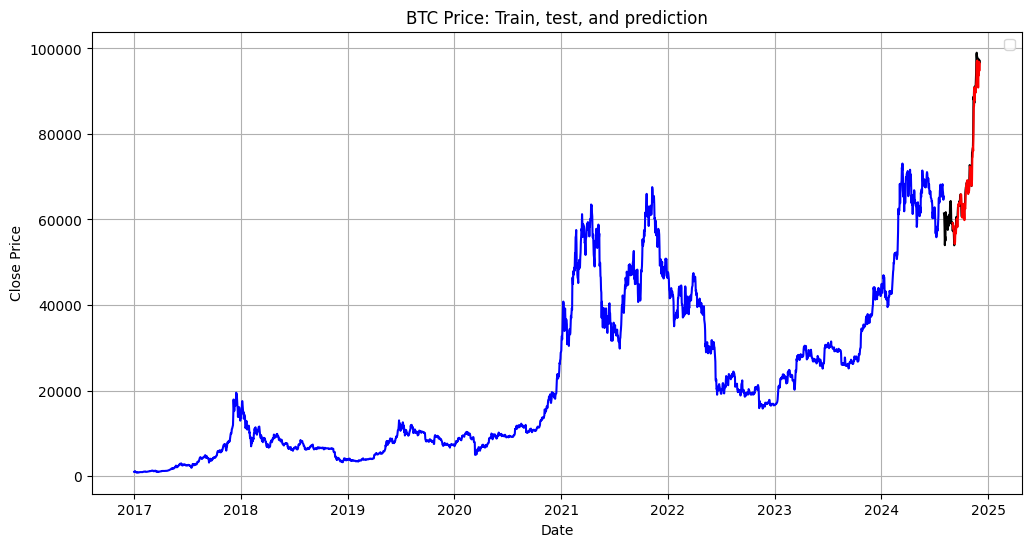

In [36]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6), facecolor='white')

# Plot training data
plt.plot(df_final['date'], df_final['close'], color='blue')
plt.plot(df_final_test['date'], df_final_test['close'], color='black')
plt.plot(y_test_pred_df['date'], y_test_pred_df['predicted_close'], color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Price: Train, test, and prediction')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [37]:
!pip install mplfinance

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


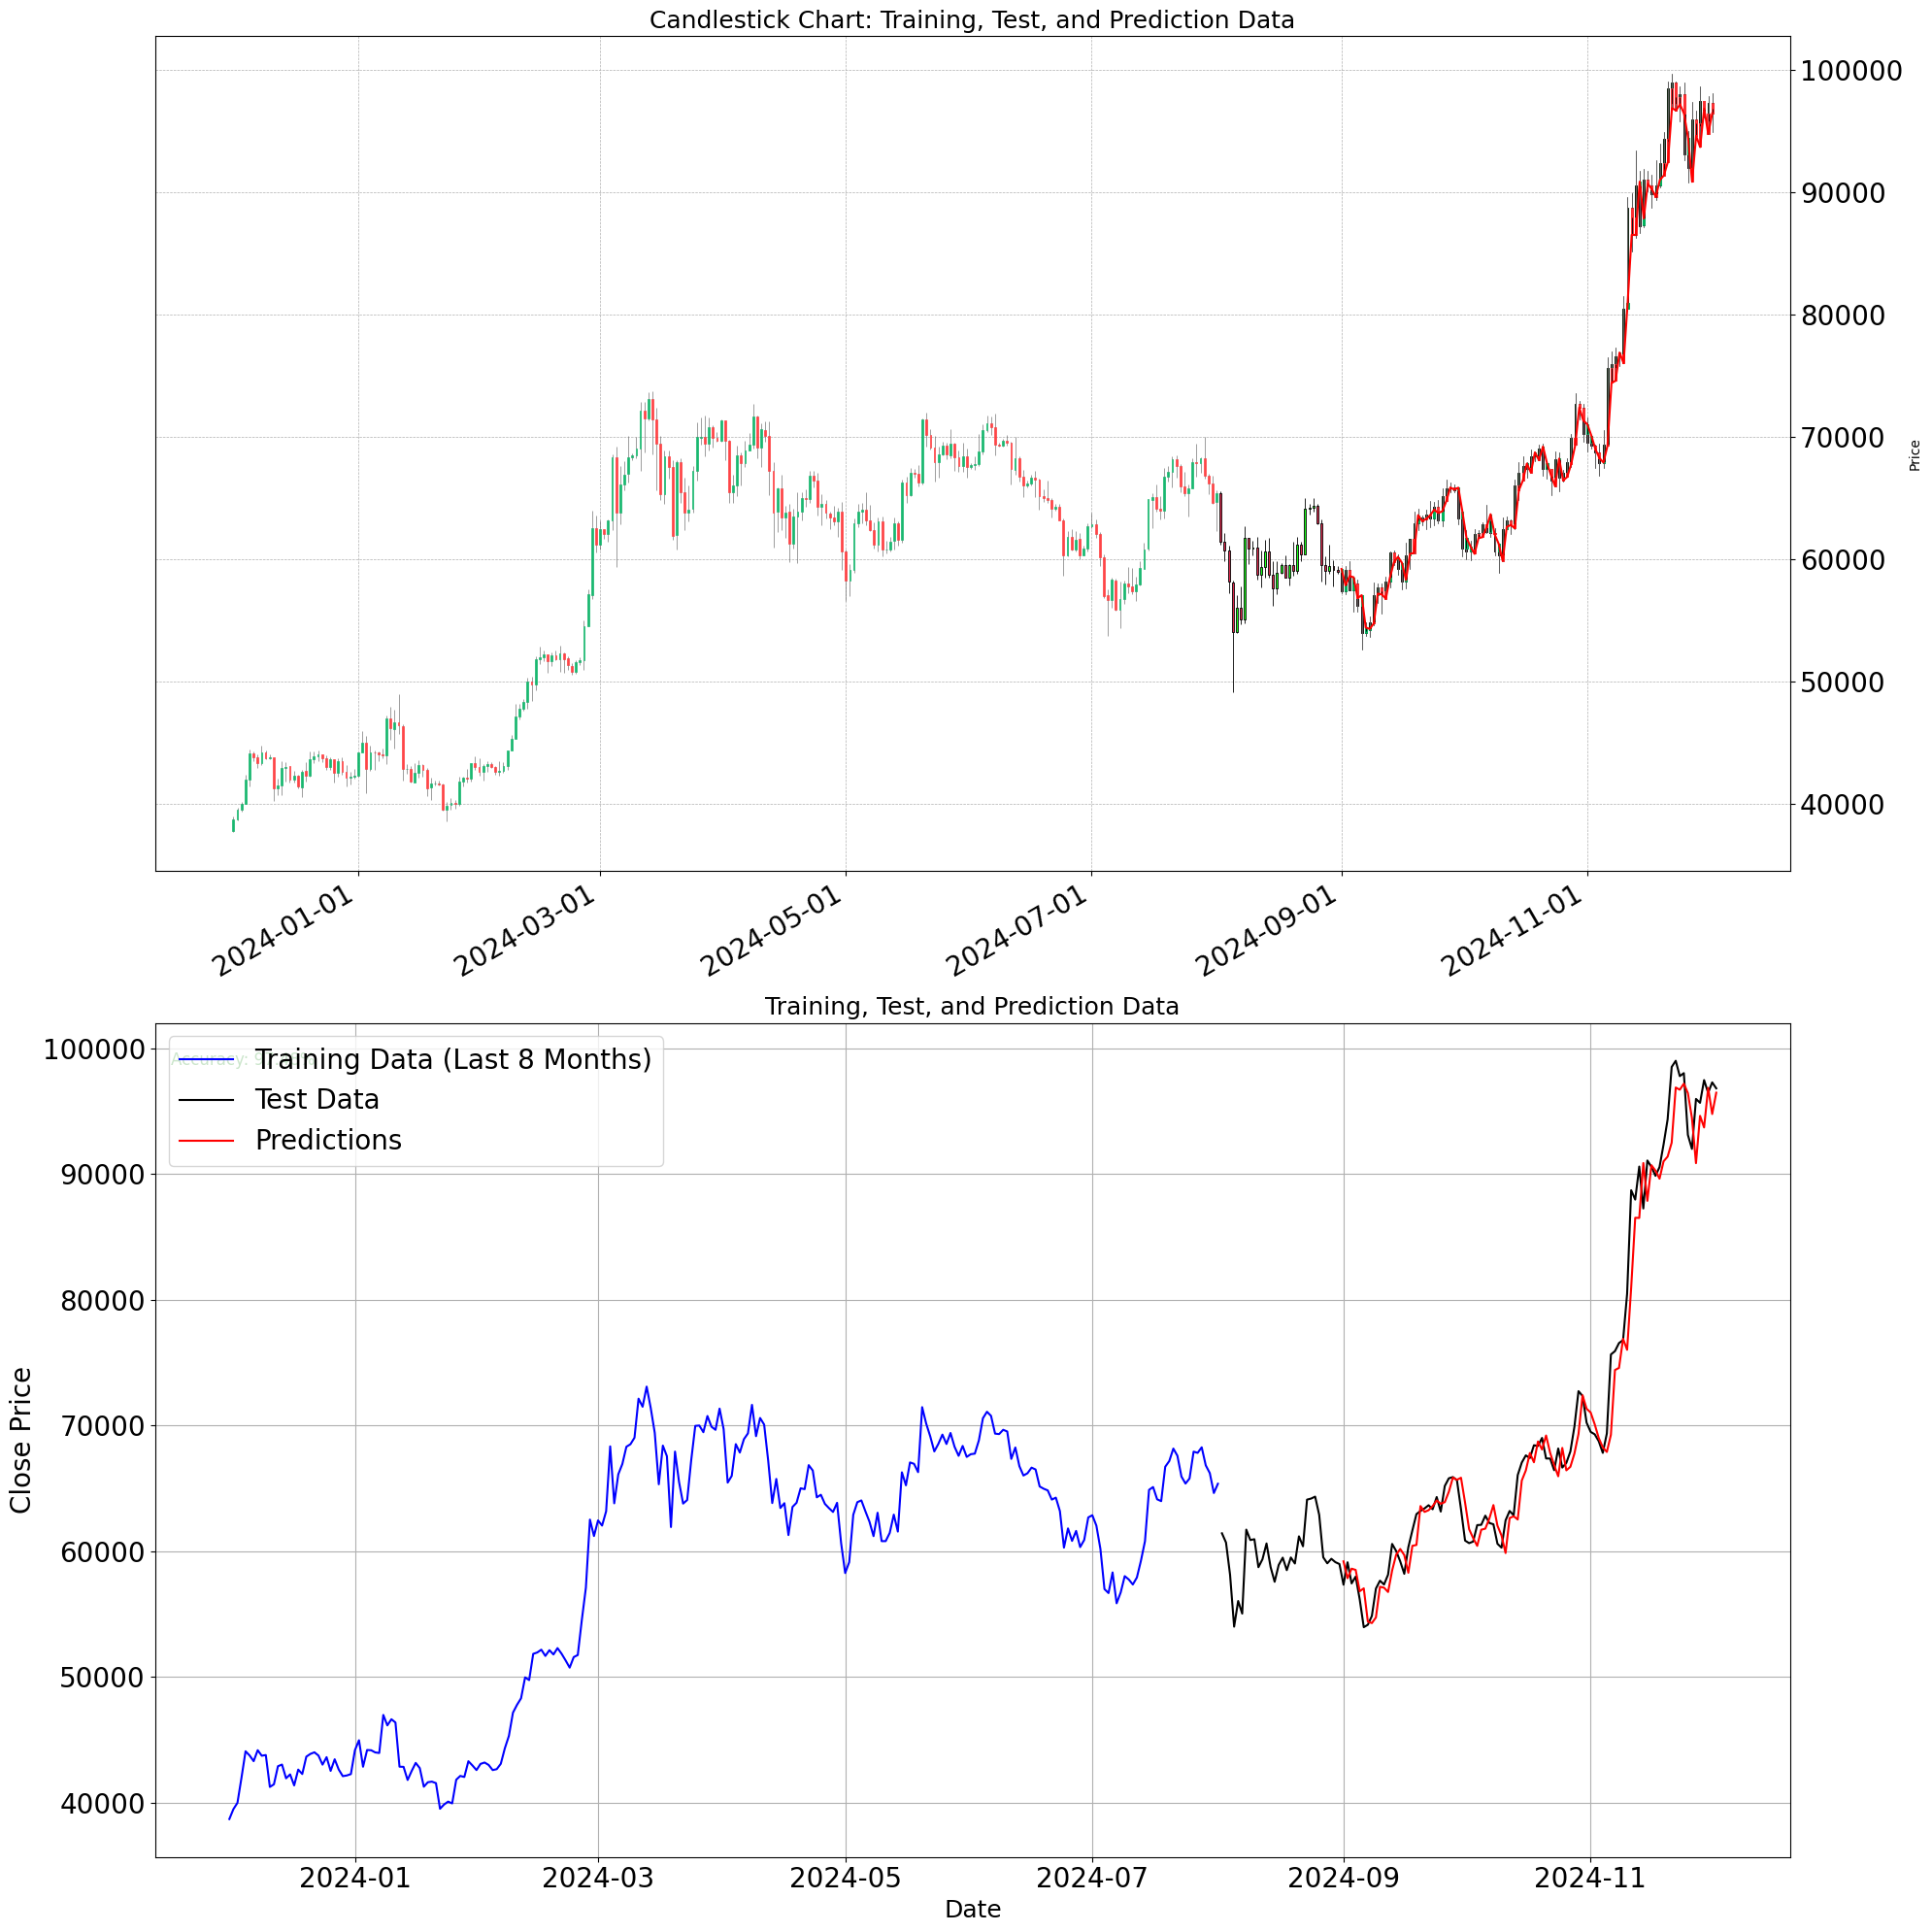

In [38]:
import matplotlib.pyplot as plt
import mplfinance as mpf  # For candlestick plotting
import pandas as pd  # Ensure pandas is imported for data handling
from matplotlib.dates import DateFormatter

# Ensure date columns are in datetime format
df_final['date'] = pd.to_datetime(df_final['date'])
df_final_test['date'] = pd.to_datetime(df_final_test['date'])
y_test_pred_df['date'] = pd.to_datetime(y_test_pred_df['date'])

# Define accuracy value
accuracy = 97.48

# --- Data Preparation ---
# Filter last 8 months of training data
train_last_8_months = df_final[df_final['date'] >= (df_final['date'].max() - pd.DateOffset(months=8))]

# Prepare candlestick data for training
train_candle_data = train_last_8_months[['date', 'open', 'high', 'low', 'close']].copy()
train_candle_data.set_index('date', inplace=True)

# Prepare candlestick data for test
test_candle_data = df_final_test[['date', 'open', 'high', 'low', 'close']].copy()
test_candle_data.set_index('date', inplace=True)

# Prepare candlestick data for predictions
prediction_candle_data = y_test_pred_df[['date', 'open', 'high', 'low', 'predicted_close']].copy()
prediction_candle_data.rename(
    columns={
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'predicted_close': 'close'
    },
    inplace=True
)
prediction_candle_data.set_index('date', inplace=True)

# --- Plotting ---
# Create a figure with adjusted layout
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(2, 1)  # Two rows: one for candlestick, one for line chart

# --- Candlestick Chart (Training, Test, and Predictions) ---
# Subplot for candlestick chart
ax1 = fig.add_subplot(gs[0, 0])

# Plot Training Data as Candlestick Chart
mpf.plot(
    train_candle_data,
    type='candle',
    style='yahoo',  # Optional: Use a pre-defined style
    show_nontrading=True,
    ax=ax1,
    ylabel='Price',
    volume=False  # Exclude volume bar if unnecessary
)

# Define a custom style for Test Data
custom_marketcolors_test = mpf.make_marketcolors(
    up='lime',         # Color for upward candles
    down='crimson',    # Color for downward candles
    edge='black',      # Edge color for candles
    wick='black',      # Wick color
)

custom_style_test = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    marketcolors=custom_marketcolors_test
)

# Plot Test Data as Candlestick Chart
mpf.plot(
    test_candle_data,
    type='candle',
    style=custom_style_test,
    show_nontrading=True,
    ax=ax1
)

# Define a custom style for Predictions
custom_marketcolors_pred = mpf.make_marketcolors(
    up='green',         # Color for upward candles
    down='red',     # Color for downward candles
    edge='black',      # Edge color for candles
    wick='black',      # Wick color
)

custom_style_pred = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    marketcolors=custom_marketcolors_pred
)

# Overlay Predictions as Candlestick Chart
mpf.plot(
    prediction_candle_data,
    type='candle',
    style='yahoo',
    show_nontrading=True, 
    ax=ax1
)

ax1.plot(
    prediction_candle_data.index,
    prediction_candle_data['close'],
    color='red',
    alpha=1,
    linestyle='-',
    label='Prediction Line'
)

# Add grid to the candlestick chart
ax1.grid(True, linestyle='--', linewidth=0.5)


# Format x-axis labels to display dates in Year-Month-Day format
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()  # Rotate x-axis labels for better visibility

# Add title to the candlestick chart
ax1.set_title('Candlestick Chart: Training, Test, and Prediction Data', fontsize=18)

# --- Line Chart (Training, Test, and Predictions) ---
# Subplot for line chart
ax2 = fig.add_subplot(gs[1, 0])

# Plot Training Data (Last 8 Months), Test Data, and Predictions
ax2.plot(train_last_8_months['date'], train_last_8_months['close'], color='blue', label='Training Data (Last 8 Months)')
ax2.plot(df_final_test['date'], df_final_test['close'], color='black', label='Test Data')
ax2.plot(y_test_pred_df['date'], y_test_pred_df['predicted_close'], color='red', label='Predictions')

# Add labels, legend, and grid
ax2.set_xlabel('Date', fontsize=18)
ax2.set_ylabel('Close Price', fontsize=20)
ax2.legend(loc='upper left', fontsize=20)
ax2.grid(True)

# Add accuracy as text
ax2.text(0.01, 0.95, f'Accuracy: {accuracy:.2f}%', transform=ax2.transAxes, fontsize=12, color='green', ha='left')

# Add title to the line chart
ax2.set_title('Training, Test, and Prediction Data', fontsize=18)

# Resize ticks
ax1.tick_params(axis='x', labelsize=20)  # Resize x-ticks
ax1.tick_params(axis='y', labelsize=20)  # Resize y-ticks
ax2.tick_params(axis='x', labelsize=20)  # Resize x-ticks
ax2.tick_params(axis='y', labelsize=20)  # Resize y-ticks

# Adjust layout and save
plt.tight_layout()
plt.savefig('btc_price_candlestick_and_line_chart_with_predictions.png', dpi=300)
plt.show()


# <p style="padding:20px;background-color:black;margin:0;color:yellow;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">Step 6 |   predict REAL Future!</p>

<div style="color:black; 
            padding: 10px; 
            border-radius: 5px; 
            background-color: #FFA500; 
            font-size: 130%; 
            font-family: newtimeroman;
            text-align:center;
            letter-spacing: 0.5px;">

     
  <span style="font-size:18px;"><span style="font-weight:800;"><span style="color:black;"> In this approach we will use whole dataset as train values.and because we are predicting unseen datas on both X_feature and Y.there will be no Evaluation and Testing...all results are just guessing and predicting. </span>
</div>
     

In [39]:
from sklearn.preprocessing import MinMaxScaler

# List of features to scale (excluding 'close' as it's the target)
features_to_scale = ['open', 'high', 'low', 'volume']

# Initialize scalers
scaler = MinMaxScaler(feature_range=(0, 1))  # For features
scaler_y = MinMaxScaler(feature_range=(0, 1))  # For the target 'close'

# Fit the scalers
scaler.fit(df_timeless[features_to_scale])  # Fit on input features
scaler_y.fit(df_timeless[['close']].values.reshape(-1, 1))  # Fit only on the target 'close'

# Transform the features
df_timeless[features_to_scale] = scaler.transform(df_timeless[features_to_scale])

# Transform and update the 'close' column in the DataFrame
df_timeless['close'] = scaler_y.transform(df_timeless[['close']].values.reshape(-1, 1))

# Prepare target variables for training, validation, and testing
y_train_future = df_timeless[['close']].values


In [40]:
# Function to create sequences (ensuring only features are included in X)
def create_sequences(df_timeless, target_col, look_back=30, feature_cols=None):
    X, y = [], []
    for i in range(len(df_timeless) - look_back):
        X.append(df_timeless[feature_cols].iloc[i:i+look_back].values)  # Only use selected features for X
        y.append(df_timeless.iloc[i + look_back][target_col])  # Use 'close' for y
    return np.array(X), np.array(y)

# List of features to use for X (exclude 'close')
features = ['open', 'high', 'low', 'volume']

# Prepare sequences for train, validation, and test sets
X_train_future, y_train_future = create_sequences(df_timeless, target_col='close', look_back=30, feature_cols=features)
y_train_future = np.reshape(y_train_future, (-1, 1))

# Check the shapes of the resulting arrays
print(f"Train X_future shape: {X_train_future.shape}, y_future shape: {y_train_future.shape}")


Train X_future shape: (2863, 30, 4), y_future shape: (2863, 1)


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import Nadam


# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_future.shape[1], X_train_future.shape[2])),  
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),  # Dense layer for intermediate learning
    Dense(1)  # Output layer (predicting the 'Close' price)
])

# Compile the model
learning_rate = 0.001  # Adjust this value as needed

custom_optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True,verbose=1)

# Model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_161 (LSTM)                 │ (None, 30, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_162 (LSTM)                 │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,801 (206.25 KB)

 Trainable params: 52,801 (206.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
history = model.fit(
    X_train_future, y_train_future,
    epochs=100,
    batch_size=64,
    verbose=1
)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0353
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4255e-04
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8172e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3271e-04
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8384e-04
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3785e-04
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1914e-04
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6643e-04
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1323e-04
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8011e-04
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0683e-04
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1526e-04
Epoch 13/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0869e-04
Epoch 14/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6632e-04
Epoch 15/100
45/45 

<div style="color:black; 
            padding: 10px; 
            border-radius: 5px; 
            background-color: #FFFF00; 
            font-size: 130%; 
            font-family: newtimeroman;
            text-align:center;
            letter-spacing: 0.5px;">

     
  <span style="font-size:18px;"><span style="font-weight:800;"><span style="color:black;"> after training our model on whole dataset,in the predicting part,instead of using x_test to get our prediction,we can use last sequence of our features in range of look_back time(30 days) as a source for predcting the next day,<br>
  for example we will use day 20 featurse to predict unseen result on day 21.and we repeat this cycle untill get all prediction days that we want.... </span>
</div>
     

In [43]:
# Drop the target column from df_timeless
df_timeless_features = df_timeless.drop(columns=['close'])
look_back=30
last_sequence = df_timeless_features.iloc[-look_back:].values.reshape(1, look_back, X_train_future.shape[2])


In [44]:
future_prediction_x = model.predict(last_sequence)
future_prediction = scaler_y.inverse_transform(future_prediction_x)
print(f"Future Prediction: {future_prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Future Prediction: 95967.46875


In [45]:
look_back = 30  # Number of timesteps
current_sequence = X_train_future[-1:].copy()  # Start with the last sequence
future_predictions = []

for _ in range(10):  # Predict for 10 future days
    # Make the prediction
    next_pred = model.predict(current_sequence)
    #next_pred = scaler_y.inverse_transform(next_pred_X)
    future_predictions.append(next_pred[0][0])  # Save the scalar prediction

    # Update the sequence: Keep other feature values, update the predicted one
    new_feature_vector = current_sequence[:, -1:, :].copy()  # Copy the last timestep
    new_feature_vector[0, 0, -1] = next_pred[0][0]  # Update the prediction for the target feature

    # Append the new feature vector to the sequence, dropping the oldest timestep
    current_sequence = np.append(current_sequence[:, 1:, :], new_feature_vector, axis=1)

print(f"10-Day Predictions: {future_predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
10-Day Predictions: [0.97236335, 1.0273135, 0.9524823, 0.98164845, 0.97512263, 0.9802457, 0.9836377, 0.98632294, 0.9885034, 0.9899681]


In [46]:
# Ensure future_predictions is a 2D array before applying inverse_transform
next_pred_y = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print(next_pred_y)


[[ 96283.19 ]
 [101680.39 ]
 [ 94330.47 ]
 [ 97195.17 ]
 [ 96554.2  ]
 [ 97057.39 ]
 [ 97390.555]
 [ 97654.3  ]
 [ 97868.46 ]
 [ 98012.33 ]]


In [47]:
import pandas as pd

# Generate dates for the predictions
prediction_dates = pd.date_range(start="2024-12-03", periods=10)

# Create a DataFrame with the dates and predicted values
predicted_df = pd.DataFrame({
    "Date": prediction_dates,
    "Predicted_Y": next_pred_y.flatten()  # Flatten to convert to a 1D array
})
predicted_df


,Date,Predicted_Y
0,2024-12-03,96283.187500
1,2024-12-04,101680.390625
2,2024-12-05,94330.468750
3,2024-12-06,97195.171875
4,2024-12-07,96554.203125
5,2024-12-08,97057.390625
6,2024-12-09,97390.554688
7,2024-12-10,97654.296875
8,2024-12-11,97868.460938
9,2024-12-12,98012.328125


 <p style="padding:10px;background-color:green;margin:200;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 1500px 500px;overflow:hidden;font-weight:8000">Thanks for supporting me by upvotes😍🤝</p>